## Setup

In [4]:
from theano.sandbox import cuda
cuda.use('gpu')

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29



time: 9.71 ms


In [5]:
get_ipython().magic('load_ext cellevents')

The cellevents extension is already loaded. To reload it, use:
  %reload_ext cellevents
time: 1.24 ms


In [6]:
from imp import reload
%matplotlib inline
import utils; reload(utils)
from utils import *
from __future__ import division, print_function

time: 388 ms


Using Theano backend.


## Setup Data

We are going to use PoC or GTFO, because reasons
https://www.alchemistowl.org/pocorgtfo/

I did have to make a local file so it could be a text document.

Data for the text is pulled locally
/home/jd/aidata/pocgtfo.txt

In [4]:
# Pulls in a file to learn from
path = get_file('pocgtfo.txt', origin="file:///home/jd/aidata/pocgtfo.txt")
text = open(path).read()

# Adds the others. I could make this a loop but im lazy today
path2 = get_file('pocgtfo2.txt', origin="file:///home/jd/aidata/pocgtfo2.txt")
text2 = open(path2).read()

path3 = get_file('pocgtfo3.txt', origin="file:///home/jd/aidata/pocgtfo3.txt")
text3 = open(path3).read()

path4 = get_file('pocgtfo4.txt', origin="file:///home/jd/aidata/pocgtfo4.txt")
text4 = open(path4).read()

path5 = get_file('pocgtfo5.txt', origin="file:///home/jd/aidata/pocgtfo5.txt")
text5 = open(path5).read()

path6 = get_file('pocgtfo6.txt', origin="file:///home/jd/aidata/pocgtfo6.txt")
text6 = open(path6).read()

path7 = get_file('pocgtfo7.txt', origin="file:///home/jd/aidata/pocgtfo7.txt")
text7 = open(path7).read()

path8 = get_file('pocgtfo8.txt', origin="file:///home/jd/aidata/pocgtfo8.txt")
text8 = open(path8).read()

path9 = get_file('pocgtfo9.txt', origin="file:///home/jd/aidata/pocgtfo9.txt")
text9 = open(path9).read()

path10 = get_file('pocgtfo10.txt', origin="file:///home/jd/aidata/pocgtfo10.txt")
text10 = open(path10).read()

text = text+text2+text3+text4+text5+text6+text7+text8+text9+text10
print('corpus length:', len(text))



corpus length: 1067271
time: 36.5 ms


In [5]:
# gets the total number of characters fond in the document
# There are many unique chars because of the Russian and coding.
chars = sorted(list(set(text)))
vocab_size = len(chars)+1
print('total chars:', vocab_size)

total chars: 202
time: 19.5 ms


In [6]:
#Places in the 0 chars for padding
chars.insert(0, "\0")

time: 731 µs


In [7]:
# Here is the list of chars
# Check out how weird they are
''.join(chars[1:-6])

'\n !"#$%&\'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\\]^_`abcdefghijklmnopqrstuvwxyz{|}~\x80\x81\x82¢£¨«´µ·»ÆÈÉ×àáãéïóõıőˆ˙˜αβγζθλπωϕАБВГДЕЗИЙКЛМНОПРСТУФХЦЧШЫЭЯавдезиклмнорстшё–—‘’“”•→∀∆∈−∗√≡≤⊕␣\uf731\uf734'

time: 3.93 ms


In [8]:
# creates the chars to indicies and back. Lets us make arrays of numbers not chars
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

time: 1.69 ms


In [9]:
# the idx holds the text
idx = [char_indices[c] for c in text]

time: 48.7 ms


In [10]:
idx[:10]

[43, 80, 86, 71, 84, 80, 67, 86, 75, 81]

time: 1.62 ms


In [11]:
# If everything is working correctly we will have the first sentance of the document
''.join(indices_char[i] for i in idx[:200])

'International Journal of PoC k GTFO\nIssue 0x00, a CFP with PoC\nAn epistle from the desk of Rt. Revd. Pastor Manul Laphroaig\npastor@phrack.org\nAugust 5, 2013\nLegal Note: Permission to use all or part o'

time: 2.15 ms


The data appears to have been properly loaded.

#### 4 Char Model

Lets make inputs; However, unlike the example from Jeremy we are doing 4 not 3

In [12]:
# How many chars are we doing
cs=4
#For the first char... pull back the length -1. Starts chopping up the sentances
c1_dat = [idx[i] for i in range(0, len(idx)-1-cs, cs)]
c2_dat = [idx[i+1] for i in range(0, len(idx)-1-cs, cs)]
c3_dat = [idx[i+2] for i in range(0, len(idx)-1-cs, cs)]
c4_dat = [idx[i+3] for i in range(0, len(idx)-1-cs, cs)]
c5_dat = [idx[i+3] for i in range(0, len(idx)-1-cs, cs)]

time: 106 ms


In [13]:
# Our Input 
x1 = np.stack(c1_dat[:-2])
x2 = np.stack(c2_dat[:-2])
x3 = np.stack(c3_dat[:-2])
x4 = np.stack(c4_dat[:-2])

time: 1.74 s


In [14]:
# our output
y = np.stack(c5_dat[:-2])

time: 426 ms


In [15]:
# For the x stack look at the first 4 chars
x1[:4], x2[:4], x3[:4], x4[:4]

(array([43, 84, 75, 78]),
 array([80, 80, 81,  2]),
 array([86, 67, 80, 44]),
 array([71, 86, 67, 81]))

time: 3.04 ms


In [16]:
# Same for the y stack
y[:4]

array([71, 86, 67, 81])

time: 3.75 ms


In [17]:
#Look at the share for both the xs, and ys. Since we chopped it into groups of 4 it should
# 1/4 of the size of the total. 266K is around 1/4 of 1M
x1.shape, y.shape

((266815,), (266815,))

time: 1.92 ms


In [18]:
# Latent Factors variables that are not directly observed but are rather inferred
# Why 42? Because it works?
n_fac = 42

time: 831 µs


Latent factor reminder
http://wiki.fast.ai/index.php/Lesson_5_Notes#Latent_Factors_.26_PCA

In [19]:
# embedding function. I should look at this more
def embedding_input(name, n_in, n_out):
    inp = Input(shape=(1,), dtype='int64', name=name)
    emb = Embedding(n_in, n_out, input_length=1)(inp)
    return inp, Flatten()(emb)

time: 2.36 ms


In [20]:
# Runs embedding input on all of the inputs
c1_in, c1 = embedding_input('c1', vocab_size, n_fac)
c2_in, c2 = embedding_input('c2', vocab_size, n_fac)
c3_in, c3 = embedding_input('c3', vocab_size, n_fac)
c4_in, c4 = embedding_input('c4', vocab_size, n_fac)

time: 32.7 ms


## Create and train model

We are now making this image below

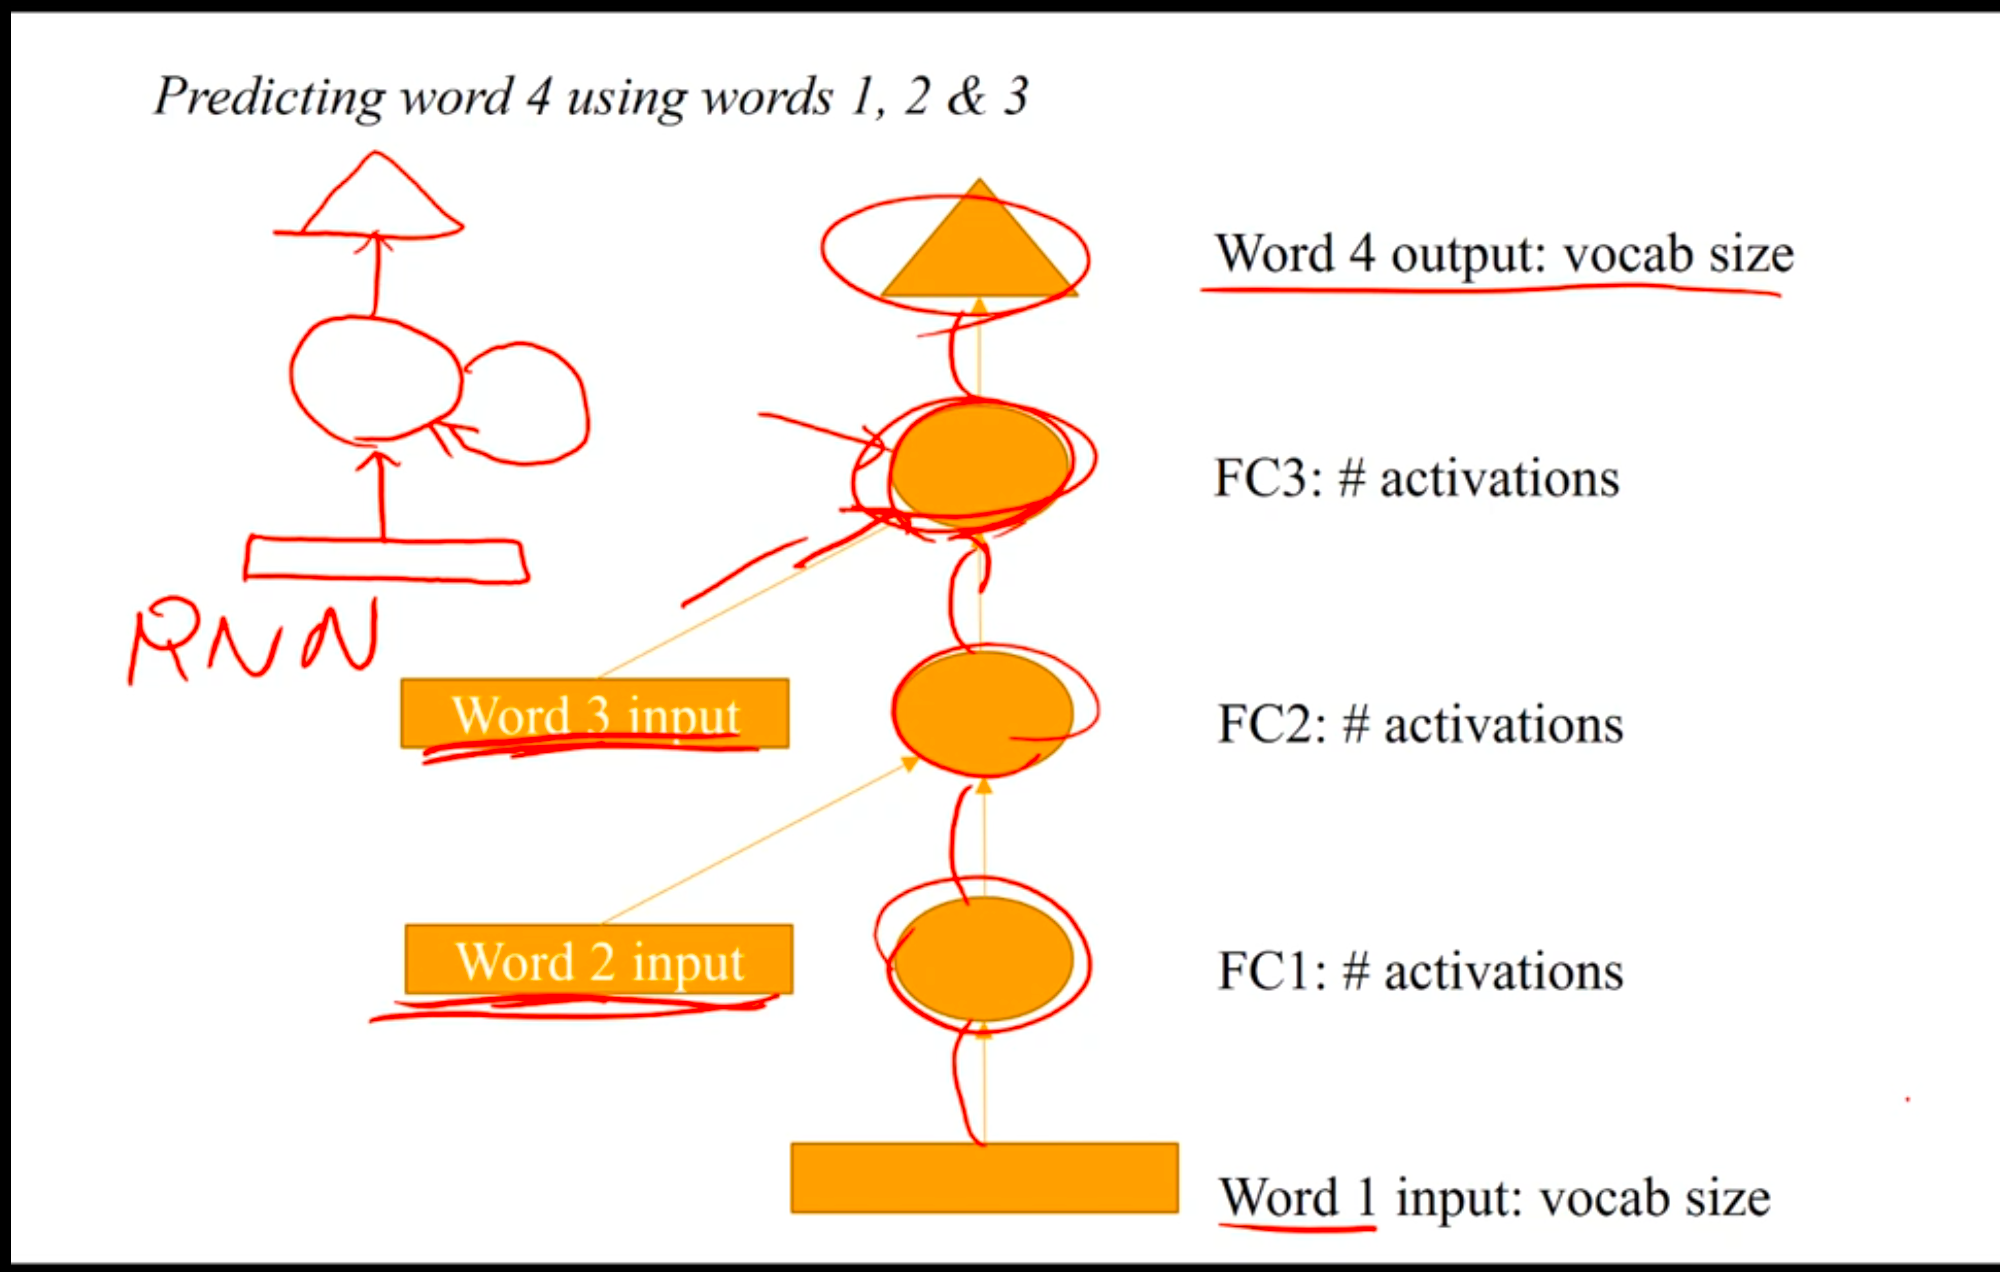

In [21]:
#Pick a size for hidden state
n_hidden = 256

time: 626 µs


In [22]:
#Creates the first arrow in from the model
dense_in = Dense(n_hidden, activation='relu')

time: 1.64 ms


In [23]:
# Create the hidden activation
c1_hidden = dense_in(c1)

time: 3.32 ms


In [24]:
# Orange arrows
dense_hidden = Dense(n_hidden, activation='tanh')

time: 726 µs


The other hidden activations

In [25]:
c2_dense = dense_in(c2)
hidden_2 = dense_hidden(c1_hidden)
c2_hidden = merge([c2_dense, hidden_2])

time: 4.89 ms


In [26]:
c3_dense = dense_in(c3)
hidden_3 = dense_hidden(c2_hidden)
c3_hidden = merge([c3_dense, hidden_3])

time: 3.04 ms


In [27]:
c4_dense = dense_in(c4)
hidden_4 = dense_hidden(c3_hidden)
c4_hidden = merge([c4_dense, hidden_4])

time: 10.3 ms


The last arrow of the diagram

In [28]:
# Our last our
dense_out = Dense(vocab_size, activation='softmax')

time: 1.74 ms


In [29]:
# Put in the last layer that goes out
c5_out = dense_out(c4_hidden)

time: 3.11 ms


In [30]:
# The model will have 4 inputs and 1 output
model = Model([c1_in, c2_in, c3_in, c4_in], c5_out)

time: 1.41 ms


# 4 Input Model Run

In [31]:
# Build that model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam())

time: 20.4 ms


In [32]:
# Set a learning rate for the model
model.optimizer.lr=0.000001

time: 801 µs


In [33]:
# This runs very fast
model.fit([x1, x2, x3, x4], y, batch_size=64, nb_epoch=1)

Epoch 1/1
266815/266815 [==============================] - 9s - loss: 5.2200     


time: 12.5 s


In [34]:
#Put in a steeper learning curve
model.optimizer.lr=0.01

time: 772 µs


In [35]:
#Run the model a few times
model.fit([x1, x2, x3, x4], y, batch_size=64, nb_epoch=1)

Epoch 1/1
266815/266815 [==============================] - 9s - loss: 4.6031     


time: 9.81 s


In [36]:
# Get a detailed optimizer
model.optimizer.lr=(0.000001)

time: 714 µs


In [37]:
model.fit([x1, x2, x3, x4], y, batch_size=64, nb_epoch=1)

Epoch 1/1
266815/266815 [==============================] - 9s - loss: 3.6719     


time: 9.77 s


In [38]:
model.optimizer.lr=(0.01)

time: 694 µs


In [39]:
model.fit([x1, x2, x3, x4], y, batch_size=64, nb_epoch=1)

Epoch 1/1
266815/266815 [==============================] - 9s - loss: 3.4192     


time: 9.77 s


###  Test the Model

In [40]:
# a function to test the next one
def get_next(inp):
    idxs = [char_indices[c] for c in inp]
    arrs = [np.array(i)[np.newaxis] for i in idxs]
    p = model.predict(arrs)
    i = np.argmax(p)
    return chars[i]

time: 3.39 ms


In [41]:
# book
get_next(' boo')

' '

time: 453 ms


In [42]:
# This loop should pop out k for " book" but it keeps throwing out o. 
# There are no words with " booo" so this seem odd and I ran this until it learned o.
current = ''
check =''
chance = 0
while (current != check):
    model.fit([x1, x2, x3, x4], y, batch_size=64, nb_epoch=1,verbose=0)
    current = get_next(' boo')
    chance = chance +1
    print ("Run "+str(chance) +": Current letter is "+current)

time: 3.81 ms


In [43]:
#Worship
get_next('orsh')

' '

time: 5.44 ms


In [44]:
#Goodspeed
get_next('Good')

' '

time: 3.17 ms


In [45]:
#**ck Out
get_next('uk O')

' '

time: 3.68 ms


In [46]:
#**ck Out
get_next('k Ou')

' '

time: 1.98 ms


In [47]:
# **** Out ... something should go after
get_next(' Out')

' '

time: 2.6 ms


In [48]:
#Pastor Manul Laphroaig
get_next('Past')

' '

time: 2.4 ms


None of these work which is very strange. I need to post to ask about them.

## back to three!
Something is very weird with 4. Lets try 3

In [49]:
## Brute copy everything for 3
## Create and train model
#Pick a size for hidden state

n_hidden = 256
cs=3

#Creates the first arrow in from the model
dense_in = Dense(n_hidden, activation='relu')

# Create the hidden activation
c1_hidden = dense_in(c1)

# Orange arrows
dense_hidden = Dense(n_hidden, activation='tanh')

#The other activations

c2_dense = dense_in(c2)
hidden_2 = dense_hidden(c1_hidden)
c2_hidden = merge([c2_dense, hidden_2])

c3_dense = dense_in(c3)
hidden_3 = dense_hidden(c2_hidden)
c3_hidden = merge([c3_dense, hidden_3])

dense_out = Dense(vocab_size, activation='softmax')

# Put in the last layer that goes out
c4_out = dense_out(c3_hidden)

# The model will have 3 inputs and 1 output
model = Model([c1_in, c2_in, c3_in], c4_out)

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam())

# Let a proper learning rate for the model
model.optimizer.lr=0.000001

time: 38.5 ms


In [50]:
model.optimizer.lr=(0.01)
model.fit([x1, x2, x3], y, batch_size=64, nb_epoch=1)

Epoch 1/1
266815/266815 [==============================] - 8s - loss: 2.8162     


time: 10.7 s


In [51]:
model.optimizer.lr=(0.00001)
model.fit([x1, x2, x3], y, batch_size=64, nb_epoch=1)

Epoch 1/1
266815/266815 [==============================] - 8s - loss: 2.8753     


time: 8.72 s


In [52]:
model.optimizer.lr=(0.01)
model.fit([x1, x2, x3], y, batch_size=64, nb_epoch=1)

Epoch 1/1
266815/266815 [==============================] - 8s - loss: 3.0102     


time: 8.79 s


In [53]:
model.optimizer.lr=(0.000001)
model.fit([x1, x2, x3], y, batch_size=64, nb_epoch=2)

Epoch 1/2
266815/266815 [==============================] - 8s - loss: 3.2486     
Epoch 2/2
266815/266815 [==============================] - 8s - loss: 3.3043     


time: 17.6 s


### Getting the next character with 3 inputs

In [54]:
# a function to test the next one
def get_next(inp):
    idxs = [char_indices[c] for c in inp]
    arrs = [np.array(i)[np.newaxis] for i in idxs]
    p = model.predict(arrs)
    i = np.argmax(p)
    return chars[i]

time: 3.35 ms


In [55]:
#Worship
get_next('rsh')

'e'

time: 227 ms


In [56]:
# Same as before. This loop should pop out k for "book" and it does on its 8th run.
# boot would also work.

current = ''
check ='k'
run = 0
while (current != check):
    # Model but I knocked out the progress bar
    model.fit([x1, x2, x3], y, batch_size=64, nb_epoch=1,verbose=0)
    current = get_next('boo')
    run = run +1
    print ("Run "+str(run) +": Current letter is "+current)

Run 1: Current letter is  
Run 2: Current letter is m
Run 3: Current letter is r
Run 4: Current letter is m
Run 5: Current letter is n
Run 6: Current letter is n
Run 7: Current letter is d
Run 8: Current letter is f
Run 9: Current letter is d
Run 10: Current letter is n
Run 11: Current letter is r
Run 12: Current letter is l
Run 13: Current letter is n
Run 14: Current letter is u
Run 15: Current letter is r
Run 16: Current letter is  
Run 17: Current letter is  
Run 18: Current letter is  
Run 19: Current letter is k
time: 2min 40s


In [57]:
#Goodspeed
get_next('Goo')

'k'

time: 2.53 ms


In [58]:
#model.fit([x1, x2, x3], y, batch_size=64, nb_epoch=1)

time: 4.91 ms


# Time for our RNNS

## Create Inputs

Size of the unrolled RNN

In [59]:
# Number of letters used in the RNN
cs=8

time: 4.35 ms


In [60]:
#For each of 0 through 7, create a list of every 8th character with that starting point. 
# These will be the 8 inputs to out model.
c_in_dat = [[idx[i+n] for i in range(0, len(idx)-1-cs, cs)]
            for n in range(cs)]

time: 85.5 ms


In [61]:
# writes the outputs for the model
c_out_dat = [idx[i+cs] for i in range(0, len(idx)-1-cs, cs)]

time: 12.5 ms


In [62]:
#gets the stack 
xs = [np.stack(c[:-2]) for c in c_in_dat]

time: 1.75 s


In [63]:
# Breaks it into sets of 8
len(xs), xs[0].shape

(8, (133406,))

time: 1.78 ms


In [64]:
y = np.stack(c_out_dat[:-2])

time: 219 ms


In [65]:
# Sets up lists of characters for input
[xs[n][:cs] for n in range(cs)]

[array([43, 75, 87,  2, 54, 71, 67, 86]),
 array([80, 81, 84, 50, 40,  2,  2, 74]),
 array([86, 80, 80, 81, 49, 18, 37,  2]),
 array([71, 67, 67, 37,  1, 90, 40, 50]),
 array([84, 78, 78,  2, 43, 18, 50, 81]),
 array([80,  2,  2, 77, 85, 18,  2, 37]),
 array([67, 44, 81,  2, 85, 14, 89,  1]),
 array([86, 81, 72, 41, 87,  2, 75, 35])]

time: 3.85 ms


In [66]:
# output
y[:cs]

array([75, 87,  2, 54, 71, 67, 86, 80])

time: 3.37 ms


In [67]:
# latent factor
n_fac = 42

time: 1.05 ms


### Create and train RNN model

In [ ]:
# embedding for RNN model
def embedding_input(name, n_in, n_out):
    inp = Input(shape=(1,), dtype='int64', name=name+'_in')
    emb = Embedding(n_in, n_out, input_length=1, name=name+'_emb')(inp)
    return inp, Flatten()(emb)

In [ ]:
# This is how the RNN will look
c_ins = [embedding_input('c'+str(n), vocab_size, n_fac) for n in range(cs)]

In [ ]:
n_hidden = 256

In [ ]:
# Setting up the RNN model.
# Dense in is the the first layer that shoots in
# Dense hidden is circling around inside
# Dense out it the exit
dense_in = Dense(n_hidden, activation='relu')
dense_hidden = Dense(n_hidden, activation='relu', init='identity')
dense_out = Dense(vocab_size, activation='softmax')

In [ ]:
# Starts our the first input as all 0s
hidden = dense_in(c_ins[0][1])

In [ ]:
# Remember CS is the number of iterations
# This runs the loops
for i in range(1,cs):
    c_dense = dense_in(c_ins[i][1])
    hidden = dense_hidden(hidden)
    hidden = merge([c_dense, hidden])

In [ ]:
# final stage to push it out
c_out = dense_out(hidden)

### Model Generation

In [ ]:
model = Model([c[0] for c in c_ins], c_out)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam())

In [ ]:
model.fit(xs, y, batch_size=64, nb_epoch=1)

### Test it

In [ ]:
def get_next(inp):
    idxs = [np.array(char_indices[c])[np.newaxis] for c in inp]
    p = model.predict(idxs)
    return chars[np.argmax(p)]

In [ ]:
#International
get_next('Internat')

In [ ]:
#International
get_next('nternati')

In [ ]:
#Pastor Laphroaig
get_next('Pastor L')

# RNN With Keras

In [ ]:
# The Vocab size is dependent on the file.
# Hidden layer, latent vactor, # chars and the vocab Size
n_hidden, n_fac, cs, vocab_size = (256, 42, 8, 203)

In [ ]:
# Sequential model 
model=Sequential([
        #Embedding like everywhere else
        Embedding(vocab_size, n_fac, input_length=cs),
        #The RNN or hidden layer in the middle
        SimpleRNN(n_hidden, activation='relu', inner_init='identity'),
        #Ending Softmax
        Dense(vocab_size, activation='softmax')
    ])

In [ ]:
model.summary()

In [ ]:
# Compiles the model and uses sparse categorical to reduce the size of the 
# Adam is used to make momentum better
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam())

In [ ]:
model.fit(np.concatenate(xs,axis=1), y, batch_size=64, nb_epoch=1)

In [ ]:
# predicts the next one
def get_nexts_keras(inp):
    idxs = [char_indices[c] for c in inp]
    arr = np.array(idxs)[np.newaxis,:]
    p = model.predict(arr)[0]
    print(list(inp))
    return [chars[np.argmax(o)] for o in p]

In [ ]:
# Seems off
get_nexts_keras('this is ')

# Return Sequences

## Create Inputs

In [ ]:
# for c_out 
c_out_dat = [[idx[i+n] for i in range(1, len(idx)-cs, cs)]
            for n in range(cs)]

In [ ]:
# 
ys = [np.stack(c[:-2]) for c in c_out_dat]

In [ ]:
[xs[n][:cs] for n in range(cs)]

In [ ]:
[ys[n][:cs] for n in range(cs)]

### Create and train model

In [ ]:
# The 3 layers for our sandwich
#Input
dense_in = Dense(n_hidden, activation='relu')
#Hidden layer
dense_hidden = Dense(n_hidden, activation='relu', init='identity')
#output
dense_out = Dense(vocab_size, activation='softmax', name='output')

In [ ]:
#primes the inital set to 0
inp1 = Input(shape=(n_fac,), name='zeros')
hidden = dense_in(inp1)

In [ ]:
# Build an empty arry for the outputs
outs = []

#I in the range of cs (8)

for i in range(cs):
    #Take the input layer
    c_dense = dense_in(c_ins[i][1])
    # Run the hidden layer
    hidden = dense_hidden(hidden)
    # combine the input and the hidden layer
    hidden = merge([c_dense, hidden], mode='sum')
    # every layer now has an output
    outs.append(dense_out(hidden))

In [ ]:
# what is this?
model = Model([inp1] + [c[0] for c in c_ins], outs)
# runs the model; Sparse categorical:
# is able to take an integer target instead of a one-hot encoded vector 
# and does the indexing into that vector directly
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam())

In [ ]:
# zeros everything first?
zeros = np.tile(np.zeros(n_fac), (len(xs[0]),1))
zeros.shape

In [ ]:
model.fit([zeros]+xs, ys, batch_size=64, nb_epoch=1)

### Test model

In [ ]:
# predicts the next ones
# for input
def get_nexts(inp):
    idxs = [char_indices[c] for c in inp]
    arrs = [np.array(i)[np.newaxis] for i in idxs]
    p = model.predict([np.zeros(n_fac)[np.newaxis,:]] + arrs)
    print(list(inp))
    return [chars[np.argmax(o)] for o in p]

In [ ]:
get_nexts(' this is')

In [ ]:
get_nexts(' part of')

### Sequence Model with Keras

In [ ]:
# Preps modules for use
n_hidden, n_fac, cs, vocab_size

In [ ]:
# Creates a sequence model similar to the other models.
model=Sequential([
        #Embedding similar to others
        Embedding(vocab_size, n_fac, input_length=cs),
        SimpleRNN(n_hidden, return_sequences=True, activation='relu', inner_init='identity'),
        TimeDistributed(Dense(vocab_size, activation='softmax')),
    ])

In [ ]:
# Output of summary
model.summary()

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam())

In [ ]:
# Shape of the first xs part
xs[0].shape

In [ ]:
## stack is changed to concatenate
x_rnn=np.concatenate(xs, axis=1)
y_rnn=np.expand_dims(np.concatenate(ys, axis=1), -1)

In [ ]:
# double checks your shapes for both x and y
x_rnn.shape, y_rnn.shape

In [ ]:
# fits teh model for x and y
model.fit(x_rnn, y_rnn, batch_size=64, nb_epoch=1)

In [ ]:
def get_nexts_keras(inp):
    idxs = [char_indices[c] for c in inp]
    arr = np.array(idxs)[np.newaxis,:]
    p = model.predict(arr)[0]
    print(list(inp))
    return [chars[np.argmax(o)] for o in p]

In [ ]:
get_nexts_keras(' this is')

### One Hot sequence model with keras

In [ ]:
model=Sequential([
        SimpleRNN(n_hidden, return_sequences=True, input_shape=(cs, vocab_size),
                  activation='relu', inner_init='identity'),
        TimeDistributed(Dense(vocab_size, activation='softmax')),
    ])
model.compile(loss='categorical_crossentropy', optimizer=Adam())

In [ ]:
oh_ys = [to_categorical(o, vocab_size) for o in ys]
oh_y_rnn=np.stack(oh_ys, axis=1)

oh_xs = [to_categorical(o, vocab_size) for o in xs]
oh_x_rnn=np.stack(oh_xs, axis=1)

oh_x_rnn.shape, oh_y_rnn.shape

In [ ]:
model.fit(oh_x_rnn, oh_y_rnn, batch_size=64, nb_epoch=1)

In [ ]:
def get_nexts_oh(inp):
    idxs = np.array([char_indices[c] for c in inp])
    arr = to_categorical(idxs, vocab_size)
    p = model.predict(arr[np.newaxis,:])[0]
    print(list(inp))
    return [chars[np.argmax(o)] for o in p]

In [ ]:
get_nexts_oh(' this is')

## Stateful model with keras


In [ ]:
# Sets the batch sizes
bs=64

In [ ]:
# New model
model=Sequential([
        #embedding for certain size
        Embedding(vocab_size, n_fac, input_length=cs, batch_input_shape=(bs,8)),
        # provides batch normalization
        BatchNormalization(),
        # LSTM Long short term memory
        LSTM(n_hidden, return_sequences=True, stateful=True),
        TimeDistributed(Dense(vocab_size, activation='softmax')),
    ])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam())

In [ ]:
mx = len(x_rnn)//bs*bs

In [ ]:
model.fit(x_rnn[:mx], y_rnn[:mx], batch_size=bs, nb_epoch=1, shuffle=False)

In [ ]:
model.optimizer.lr=1e-4

In [ ]:
model.fit(x_rnn[:mx], y_rnn[:mx], batch_size=bs, nb_epoch=1, shuffle=False)

In [ ]:
model.fit(x_rnn[:mx], y_rnn[:mx], batch_size=bs, nb_epoch=1, shuffle=False)

## Theano RNN

In [ ]:
# gets inital is set to vocab_size
n_input = vocab_size
n_output = vocab_size

In [ ]:
def init_wgts(rows, cols): 
    scale = math.sqrt(2/rows)
    return shared(normal(scale=scale, size=(rows, cols)).astype(np.float32))
def init_bias(rows): 
    return shared(np.zeros(rows, dtype=np.float32))

In [ ]:
def wgts_and_bias(n_in, n_out): 
    return init_wgts(n_in, n_out), init_bias(n_out)
def id_and_bias(n): 
    return shared(np.eye(n, dtype=np.float32)), init_bias(n)

In [ ]:
t_inp = T.matrix('inp')
t_outp = T.matrix('outp')
t_h0 = T.vector('h0')
lr = T.scalar('lr')

all_args = [t_h0, t_inp, t_outp, lr]

In [ ]:
W_h = id_and_bias(n_hidden)
W_x = wgts_and_bias(n_input, n_hidden)
W_y = wgts_and_bias(n_hidden, n_output)
w_all = list(chain.from_iterable([W_h, W_x, W_y]))

In [ ]:
def step(x, h, W_h, b_h, W_x, b_x, W_y, b_y):
    # Calculate the hidden activations
    h = nnet.relu(T.dot(x, W_x) + b_x + T.dot(h, W_h) + b_h)
    # Calculate the output activations
    y = nnet.softmax(T.dot(h, W_y) + b_y)
    # Return both (the 'Flatten()' is to work around a theano bug)
    return h, T.flatten(y, 1)

In [ ]:
[v_h, v_y], _ = theano.scan(step, sequences=t_inp, 
                            outputs_info=[t_h0, None], non_sequences=w_all)

In [ ]:
error = nnet.categorical_crossentropy(v_y, t_outp).sum()
g_all = T.grad(error, w_all)

In [ ]:
def upd_dict(wgts, grads, lr): 
    return OrderedDict({w: w-g*lr for (w,g) in zip(wgts,grads)})

upd = upd_dict(w_all, g_all, lr)

In [ ]:
fn = theano.function(all_args, error, updates=upd, allow_input_downcast=True)

In [ ]:
X = oh_x_rnn
Y = oh_y_rnn
X.shape, Y.shape

In [ ]:
err=0.0; l_rate=0.01
for i in range(len(X)): 
    err+=fn(np.zeros(n_hidden), X[i], Y[i], l_rate)
    if i % 1000 == 999: 
        print ("Error:{:.3f}".format(err/1000))
        err=0.0

In [ ]:
f_y = theano.function([t_h0, t_inp], v_y, allow_input_downcast=True)

In [ ]:
pred = np.argmax(f_y(np.zeros(n_hidden), X[6]), axis=1)

In [ ]:
act = np.argmax(X[6], axis=1)

In [ ]:
[indices_char[o] for o in act]

In [ ]:
[indices_char[o] for o in pred]

## Pure python RNN!

In [ ]:
# Just in Numpy
def sigmoid(x): return 1/(1+np.exp(-x))
def sigmoid_d(x): 
    output = sigmoid(x)
    return output*(1-output)

In [ ]:
def relu(x): return np.maximum(0., x)
def relu_d(x): return (x > 0.)*1.

In [ ]:
relu(np.array([3.,-3.])), relu_d(np.array([3.,-3.]))

In [ ]:
def dist(a,b): return pow(a-b,2)
def dist_d(a,b): return 2*(a-b)

In [ ]:
import pdb

In [ ]:
eps = 1e-7
def x_entropy(pred, actual): 
    return -np.sum(actual * np.log(np.clip(pred, eps, 1-eps)))
def x_entropy_d(pred, actual): return -actual/pred

In [ ]:
def softmax(x): return np.exp(x)/np.exp(x).sum()

In [ ]:
def softmax_d(x):
    sm = softmax(x)
    res = np.expand_dims(-sm,-1)*sm
    res[np.diag_indices_from(res)] = sm*(1-sm)
    return res

In [ ]:
test_preds = np.array([0.2,0.7,0.1])
test_actuals = np.array([0.,1.,0.])
nnet.categorical_crossentropy(test_preds, test_actuals).eval()

In [ ]:
x_entropy(test_preds, test_actuals)

In [ ]:
test_inp = T.dvector()
test_out = nnet.categorical_crossentropy(test_inp, test_actuals)
test_grad = theano.function([test_inp], T.grad(test_out, test_inp))

In [ ]:
test_grad(test_preds)

x_entropy_d(test_preds, test_actuals)

pre_pred = random(oh_x_rnn[0][0].shape)
preds = softmax(pre_pred)
actual = oh_x_rnn[0][0]

loss=x_entropy
loss_d=x_entropy_d

np.allclose(softmax_d(pre_pred).dot(loss_d(preds,actual)), preds-actual)

softmax(test_preds)

nnet.softmax(test_preds).eval()

test_out = T.flatten(nnet.softmax(test_inp))

test_grad = theano.function([test_inp], theano.gradient.jacobian(test_out, test_inp))

test_grad(test_preds)

softmax_d(test_preds)

act=relu
act_d = relu_d

loss=x_entropy
loss_d=x_entropy_d

In [ ]:
def scan(fn, start, seq):
    res = []
    prev = start
    for s in seq:
        app = fn(prev, s)
        res.append(app)
        prev = app
    return res

In [ ]:
scan(lambda prev,curr: prev+curr, 0, range(5))

### Set up training

In [ ]:
inp = oh_x_rnn
outp = oh_y_rnn
n_input = vocab_size
n_output = vocab_size

In [ ]:
inp.shape, outp.shape

In [ ]:
def one_char(prev, item):
    # Previous state
    tot_loss, pre_hidden, pre_pred, hidden, ypred = prev
    # Current inputs and output
    x, y = item
    pre_hidden = np.dot(x,w_x) + np.dot(hidden,w_h)
    hidden = act(pre_hidden)
    pre_pred = np.dot(hidden,w_y)
    ypred = softmax(pre_pred)
    return (
        # Keep track of loss so we can report it
        tot_loss+loss(ypred, y),
        # Used in backprop
        pre_hidden, pre_pred, 
        # Used in next iteration
        hidden, 
        # To provide predictions
        ypred)

In [ ]:
def get_chars(n): return zip(inp[n], outp[n])
def one_fwd(n): return scan(one_char, (0,0,0,np.zeros(n_hidden),0), get_chars(n))

In [ ]:
# "Columnify" a vector
def col(x): return x[:,newaxis]

def one_bkwd(args, n):
    global w_x,w_y,w_h

    i=inp[n]  # 8x86
    o=outp[n] # 8x86
    d_pre_hidden = np.zeros(n_hidden) # 256
    for p in reversed(range(len(i))):
        totloss, pre_hidden, pre_pred, hidden, ypred = args[p]
        x=i[p] # 86
        y=o[p] # 86
        d_pre_pred = softmax_d(pre_pred).dot(loss_d(ypred,y))  # 86
        d_pre_hidden = (np.dot(d_pre_hidden, w_h.T) 
                        + np.dot(d_pre_pred,w_y.T)) * act_d(pre_hidden) # 256

        # d(loss)/d(w_y) = d(loss)/d(pre_pred) * d(pre_pred)/d(w_y)
        w_y -= col(hidden) * d_pre_pred * alpha
        # d(loss)/d(w_h) = d(loss)/d(pre_hidden[p-1]) * d(pre_hidden[p-1])/d(w_h)
        if (p>0): w_h -= args[p-1][3].dot(d_pre_hidden) * alpha
        w_x -= col(x)*d_pre_hidden * alpha
    return d_pre_hidden

In [ ]:
scale=math.sqrt(2./n_input)
w_x = normal(scale=scale, size=(n_input,n_hidden))
w_y = normal(scale=scale, size=(n_hidden, n_output))
w_h = np.eye(n_hidden, dtype=np.float32)

In [ ]:
overallError=0
alpha=0.0001
for n in range(10000):
    res = one_fwd(n)
    overallError+=res[-1][0]
    deriv = one_bkwd(res, n)
    if(n % 1000 == 999):
        print ("Error:{:.4f}; Gradient:{:.5f}".format(
                overallError/1000, np.linalg.norm(deriv)))
        overallError=0

## Keras GRU

In [ ]:
model=Sequential([
        GRU(n_hidden, return_sequences=True, input_shape=(cs, vocab_size),
                  activation='relu', inner_init='identity'),
        TimeDistributed(Dense(vocab_size, activation='softmax')),
    ])
model.compile(loss='categorical_crossentropy', optimizer=Adam())

In [ ]:
model.fit(oh_x_rnn, oh_y_rnn, batch_size=64, nb_epoch=1)

In [ ]:
get_nexts_oh(' this is')

## Theano GRU

In [ ]:
W_h = id_and_bias(n_hidden)
W_x = init_wgts(n_input, n_hidden)
W_y = wgts_and_bias(n_hidden, n_output)
rW_h = init_wgts(n_hidden, n_hidden)
rW_x = wgts_and_bias(n_input, n_hidden)
uW_h = init_wgts(n_hidden, n_hidden)
uW_x = wgts_and_bias(n_input, n_hidden)
w_all = list(chain.from_iterable([W_h, W_y, uW_x, rW_x]))
w_all.extend([W_x, uW_h, rW_h])

In [ ]:
def gate(x, h, W_h, W_x, b_x):
    return nnet.sigmoid(T.dot(x, W_x) + b_x + T.dot(h, W_h))

In [ ]:
def step(x, h, W_h, b_h, W_y, b_y, uW_x, ub_x, rW_x, rb_x, W_x, uW_h, rW_h):
    reset = gate(x, h, rW_h, rW_x, rb_x)
    update = gate(x, h, uW_h, uW_x, ub_x)
    h_new = gate(x, h * reset, W_h, W_x, b_h)
    h = update*h + (1-update)*h_new
    y = nnet.softmax(T.dot(h, W_y) + b_y)
    return h, T.flatten(y, 1)

In [ ]:
[v_h, v_y], _ = theano.scan(step, sequences=t_inp, 
                            outputs_info=[t_h0, None], non_sequences=w_all)

In [ ]:
error = nnet.categorical_crossentropy(v_y, t_outp).sum()
g_all = T.grad(error, w_all)

In [ ]:
upd = upd_dict(w_all, g_all, lr)
fn = theano.function(all_args, error, updates=upd, allow_input_downcast=True)

In [ ]:
err=0.0; l_rate=0.1
for i in range(len(X)): 
    err+=fn(np.zeros(n_hidden), X[i], Y[i], l_rate)
    if i % 1000 == 999: 
        l_rate *= 0.95
        print ("Error:{:.2f}".format(err/1000))
        err=0.0

# Combined Weights

In [ ]:
W = (shared(np.concatenate([np.eye(n_hidden), normal(size=(n_input, n_hidden))])
            .astype(np.float32)), init_bias(n_hidden))

rW = wgts_and_bias(n_input+n_hidden, n_hidden)
uW = wgts_and_bias(n_input+n_hidden, n_hidden)
W_y = wgts_and_bias(n_hidden, n_output)
w_all = list(chain.from_iterable([W, W_y, uW, rW]))

In [ ]:
def gate(m, W, b): return nnet.sigmoid(T.dot(m, W) + b)

In [ ]:
def step(x, h, W, b, W_y, b_y, uW, ub, rW, rb):
    m = T.concatenate([h, x])
    reset = gate(m, rW, rb)
    update = gate(m, uW, ub)
    m = T.concatenate([h*reset, x])
    h_new = gate(m, W, b)
    h = update*h + (1-update)*h_new
    y = nnet.softmax(T.dot(h, W_y) + b_y)
    return h, T.flatten(y, 1)

In [ ]:
[v_h, v_y], _ = theano.scan(step, sequences=t_inp, 
                            outputs_info=[t_h0, None], non_sequences=w_all)

In [ ]:
def upd_dict(wgts, grads, lr): 
    return OrderedDict({w: w-g*lr for (w,g) in zip(wgts,grads)})

In [ ]:
error = nnet.categorical_crossentropy(v_y, t_outp).sum()
g_all = T.grad(error, w_all)

In [ ]:
upd = upd_dict(w_all, g_all, lr)
fn = theano.function(all_args, error, updates=upd, allow_input_downcast=True)

In [ ]:
err=0.0; l_rate=0.001
for i in range(len(X)): 
    err+=fn(np.zeros(n_hidden), X[i], Y[i], l_rate)
    if i % 1000 == 999: 
        print ("Error:{:.2f}".format(err/1000))
        err=0.0